## Modelo de regresión logística

In [315]:
from sklearn.linear_model import LogisticRegression

In [375]:
logreg_1 = LogisticRegression(solver='lbfgs',max_iter=1000)

In [376]:
logreg_1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [377]:
y_preds_1 = logreg_1.predict_proba(X_test)

In [378]:
print(classification_report(y_test,y_preds_1[:,1]>0.5))

              precision    recall  f1-score   support

         0.0       0.53      0.70      0.60        64
         1.0       0.44      0.27      0.34        55

    accuracy                           0.50       119
   macro avg       0.49      0.49      0.47       119
weighted avg       0.49      0.50      0.48       119



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.488


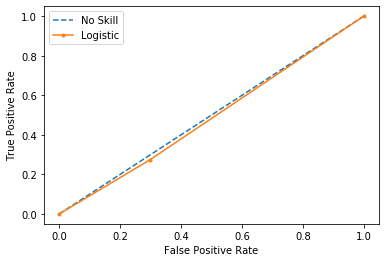

In [379]:
calculate_roc(y_test,y_preds_1[:,1]>0.5)

In [399]:
logreg = LogisticRegression(penalty='l2',solver='lbfgs',C=1 ,max_iter=1000)

In [400]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [401]:
y_preds = logreg.predict_proba(X_test)

In [402]:
param_grid = { 
    'solver': ['lbfgs', 'liblinear', 'newton-cg'],
    'C': [0.0001,0.001,0.01,0.1,1,10,100,1000]
}

In [403]:
CV_rfc = GridSearchCV(estimator=logreg, param_grid=param_grid, cv= 2,n_jobs=6, verbose=5, scoring='f1')

In [404]:
CV_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   7 out of  48 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=6)]: Done  48 out of  48 | elapsed:    1.2s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=6,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=5)

In [405]:
CV_rfc.best_params_

{'C': 1, 'solver': 'lbfgs'}

In [406]:
CV_rfc.best_estimator_.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [407]:
CV_rfc.best_estimator_.score(X_test,y_test)

0.5042016806722689

In [408]:
CV_rfc.best_score_

0.4399122807017544

In [409]:
CV_rfc.cv_results_

{'mean_fit_time': array([0.04503822, 0.00547707, 0.02837312, 0.07917595, 0.01542699,
        0.04306304, 0.07182908, 0.01285052, 0.02411056, 0.09022772,
        0.02879119, 0.02697384, 0.12166452, 0.00509048, 0.03078651,
        0.18102968, 0.0369035 , 0.03674853, 0.21566379, 0.03335083,
        0.08462203, 0.22220051, 0.03546238, 0.08468044]),
 'std_fit_time': array([0.02884483, 0.00123441, 0.00611317, 0.06174135, 0.01265228,
        0.0205549 , 0.05412912, 0.01008677, 0.0119946 , 0.07292187,
        0.02588892, 0.01002443, 0.07399416, 0.00091815, 0.00752068,
        0.09178841, 0.03196943, 0.00899208, 0.04770815, 0.02792847,
        0.03531516, 0.05063331, 0.02572274, 0.03588068]),
 'mean_score_time': array([0.00368643, 0.00313485, 0.00357497, 0.00192952, 0.00281525,
        0.00347555, 0.00204003, 0.00171757, 0.00167668, 0.00190985,
        0.00194657, 0.00156593, 0.00180435, 0.00201452, 0.00242472,
        0.00207841, 0.00175726, 0.00189054, 0.00203764, 0.00200427,
        0.002640

In [410]:
print(classification_report(y_test,y_preds[:,1]>0.5))

              precision    recall  f1-score   support

         0.0       0.53      0.70      0.60        64
         1.0       0.44      0.27      0.34        55

    accuracy                           0.50       119
   macro avg       0.49      0.49      0.47       119
weighted avg       0.49      0.50      0.48       119



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.488


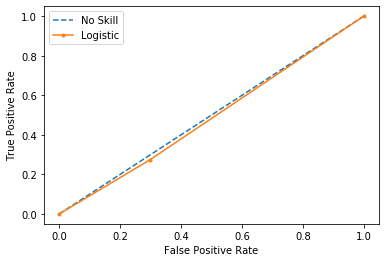

In [411]:
calculate_roc(y_test,y_preds[:,1]>0.5)